<a href="https://colab.research.google.com/github/anshuman183/Stock-Prediction/blob/main/Stock_price_prediction_using_stacked_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Collection
import pandas_datareader as pdr

In [ ]:
key='4c63493afc6c074900feb19844926902191f4305'
df = pdr.get_data_tiingo('AAPL',api_key=key)

<ipython-input-2-32cf610305e7>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key=key)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-03-11 00:00:00+00:00,178.90,179.12,175.35,175.49,32011034,43.055363,43.108310,42.200995,42.234688,128044136,0.0,1.0
1,AAPL,2019-03-12 00:00:00+00:00,180.91,182.67,179.37,180.00,32467584,43.539104,43.962679,43.168477,43.320097,129870336,0.0,1.0
2,AAPL,2019-03-13 00:00:00+00:00,181.71,183.30,180.92,182.25,31032524,43.731638,44.114299,43.541511,43.861598,124130096,0.0,1.0
3,AAPL,2019-03-14 00:00:00+00:00,183.73,184.10,182.56,183.90,23579508,44.217786,44.306833,43.936205,44.258699,94318032,0.0,1.0
4,AAPL,2019-03-15 00:00:00+00:00,186.12,187.33,183.74,184.85,39042912,44.792981,45.084188,44.220193,44.487333,156171648,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
np.max(df1)

0.9999999999999998

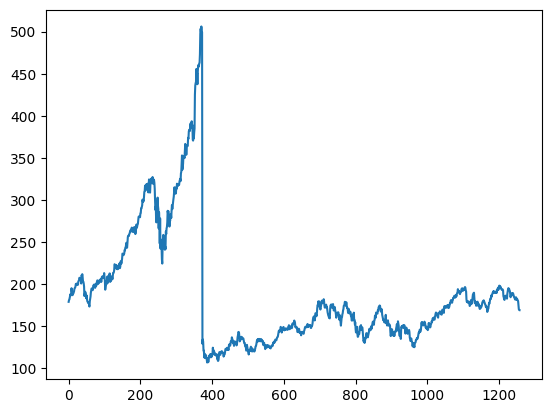

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
## LSTM are sensitive to the scale of the data. So we apply MinMax Scaler

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1258, 1)

In [ ]:
## splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size : len(df1), :1]

In [ ]:
training_size , test_size

(817, 441)

In [ ]:
import numpy
# convert an array of values into dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0] ### i=0,1,2,3
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [ ]:
# reshape into X=t ,t+1 , t+2 , t+3 and Y=t+4
time_step = 100
X_train , y_train = create_dataset(train_data ,time_step)
X_test ,ytest = create_dataset(test_data,time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
X_test

array([[[0.09843456],
        [0.10487163],
        [0.10299311],
        ...,
        [0.10672511],
        [0.11396368],
        [0.10647464]],

       [[0.10487163],
        [0.10299311],
        [0.08966813],
        ...,
        [0.11396368],
        [0.10647464],
        [0.09507827]],

       [[0.10299311],
        [0.08966813],
        [0.07586725],
        ...,
        [0.10647464],
        [0.09507827],
        [0.12247965]],

       ...,

       [[0.18071384],
        [0.17921102],
        [0.18274264],
        ...,
        [0.18680025],
        [0.1851221 ],
        [0.18239198]],

       [[0.17921102],
        [0.18274264],
        [0.18502192],
        ...,
        [0.1851221 ],
        [0.18239198],
        [0.17097057]],

       [[0.18274264],
        [0.18502192],
        [0.18036318],
        ...,
        [0.18239198],
        [0.17097057],
        [0.15849718]]])

In [ ]:
print(X_test.shape),print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples , time steps , features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
### Create the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train[1]

array([[0.18552286],
       [0.18752661],
       [0.1925861 ],
       [0.19857232],
       [0.20333125],
       [0.19959925],
       [0.2036819 ],
       [0.22103945],
       [0.21092048],
       [0.20513463],
       [0.20025047],
       [0.20445836],
       [0.20508453],
       [0.20816531],
       [0.21139637],
       [0.21835942],
       [0.22169067],
       [0.22254227],
       [0.22582342],
       [0.23358798],
       [0.23208516],
       [0.23489042],
       [0.23070758],
       [0.2305072 ],
       [0.23140889],
       [0.23145899],
       [0.24117721],
       [0.24300564],
       [0.24468378],
       [0.25207264],
       [0.25127113],
       [0.2465623 ],
       [0.2441077 ],
       [0.24488416],
       [0.23501565],
       [0.25968691],
       [0.25625548],
       [0.26276769],
       [0.25457733],
       [0.24050094],
       [0.24060113],
       [0.23514089],
       [0.22627426],
       [0.19757044],
       [0.20493425],
       [0.21059487],
       [0.20849092],
       [0.205

In [ ]:
X_train[0]

array([[0.18048842],
       [0.18552286],
       [0.18752661],
       [0.1925861 ],
       [0.19857232],
       [0.20333125],
       [0.19959925],
       [0.2036819 ],
       [0.22103945],
       [0.21092048],
       [0.20513463],
       [0.20025047],
       [0.20445836],
       [0.20508453],
       [0.20816531],
       [0.21139637],
       [0.21835942],
       [0.22169067],
       [0.22254227],
       [0.22582342],
       [0.23358798],
       [0.23208516],
       [0.23489042],
       [0.23070758],
       [0.2305072 ],
       [0.23140889],
       [0.23145899],
       [0.24117721],
       [0.24300564],
       [0.24468378],
       [0.25207264],
       [0.25127113],
       [0.2465623 ],
       [0.2441077 ],
       [0.24488416],
       [0.23501565],
       [0.25968691],
       [0.25625548],
       [0.26276769],
       [0.25457733],
       [0.24050094],
       [0.24060113],
       [0.23514089],
       [0.22627426],
       [0.19757044],
       [0.20493425],
       [0.21059487],
       [0.208

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 173ms/step - loss: 0.0016 - val_loss: 1.6599e-04
Epoch 2/100
12/12 [==============================] - 2s 161ms/step - loss: 0.0015 - val_loss: 1.5083e-04
Epoch 3/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0013 - val_loss: 1.7513e-04
Epoch 4/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0014 - val_loss: 1.6734e-04
Epoch 5/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0015 - val_loss: 1.6440e-04
Epoch 6/100
12/12 [==============================] - 2s 166ms/step - loss: 0.0014 - val_loss: 1.5607e-04
Epoch 7/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0014 - val_loss: 3.1458e-04
Epoch 8/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0032 - val_loss: 2.7987e-04
Epoch 9/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0027 - val_loss: 4.3097e-04
Epoch 10/100
12/12 [==============================] - 2

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 33ms/step


In [ ]:
## Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
### Calculated RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

218.47553812488698

In [ ]:
### Test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

172.43356361013326

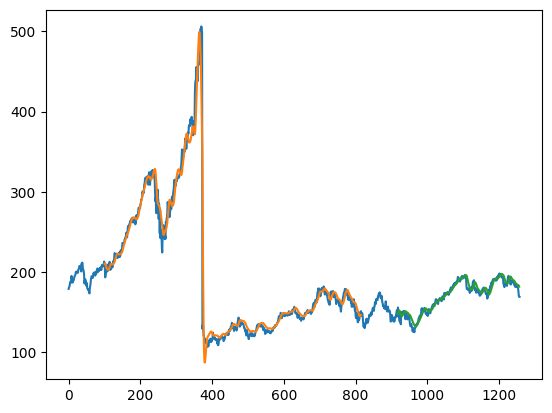

In [ ]:
### Plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#Shift test predictions for plotting

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[: , :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
X_test

array([[[0.09843456],
        [0.10487163],
        [0.10299311],
        ...,
        [0.10672511],
        [0.11396368],
        [0.10647464]],

       [[0.10487163],
        [0.10299311],
        [0.08966813],
        ...,
        [0.11396368],
        [0.10647464],
        [0.09507827]],

       [[0.10299311],
        [0.08966813],
        [0.07586725],
        ...,
        [0.10647464],
        [0.09507827],
        [0.12247965]],

       ...,

       [[0.18071384],
        [0.17921102],
        [0.18274264],
        ...,
        [0.18680025],
        [0.1851221 ],
        [0.18239198]],

       [[0.17921102],
        [0.18274264],
        [0.18502192],
        ...,
        [0.1851221 ],
        [0.18239198],
        [0.17097057]],

       [[0.18274264],
        [0.18502192],
        [0.18036318],
        ...,
        [0.18239198],
        [0.17097057],
        [0.15849718]]])

In [ ]:
len(test_data)

441

In [ ]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.18036318096430803,
 0.18003757044458357,
 0.17610519724483403,
 0.17282404508453347,
 0.17187226048841575,
 0.1654101440200375,
 0.1657107075767063,
 0.1668127739511584,
 0.16095178459611764,
 0.15040701314965554,
 0.1537382592360676,
 0.15892298058860355,
 0.16012523481527863,
 0.16814026299311202,
 0.17715716969317463,
 0.17485284909204757,
 0.1813149655604257,
 0.18780212899185966,
 0.19048215403882274,
 0.1892798998121477,
 0.19927363807138382,
 0.19526612398246712,
 0.20187852222917968,
 0.20330619912335623,
 0.2075641828428303,
 0.2075140889167188,
 0.21192235441452717,
 0.20989355040701307,
 0.211571696931747,
 0.20821540388227922,
 0.2077645585472761,
 0.2092924232936756,
 0.20671258609893545,
 0.20816530995616772,
 0.2113963681903569,
 0.20686286787726987,
 0.21685660613650587,
 0.21410144020037564,
 0.21898559799624295,
 0.22259236067626798,
 0.21625547902316838,
 0.22008766437069505,
 0.2282279273638071,
 0.22860363180964305,
 0.2272510958046336,
 0.22304320601127103,
 0.

In [ ]:
# demonstrate prediction for next 10 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input= x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:

    yhat = model.predict(x_input , verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1


print(lst_output)


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)

ValueError: x and y must have same first dimension, but have shapes (100,) and (101, 1)

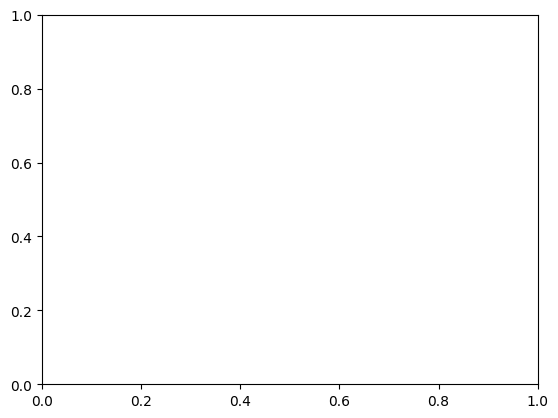

In [ ]:
plt.plot(day_new , scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

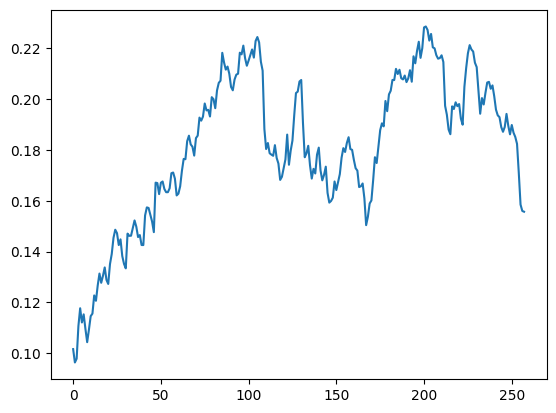

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])